<a href="https://colab.research.google.com/github/sujalsin/Portfolio-Optimization/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  4 of 4 completed
Expected annual return: 50.7%
Annual volatility: 31.9%
Sharpe Ratio: 1.53
OrderedDict([('AAPL', 0.49316), ('AMZN', 0.0), ('GOOG', 0.50684), ('MSFT', 0.0)])
Expected annual return: 50.6%
Annual volatility: 31.9%
Sharpe Ratio: 1.53


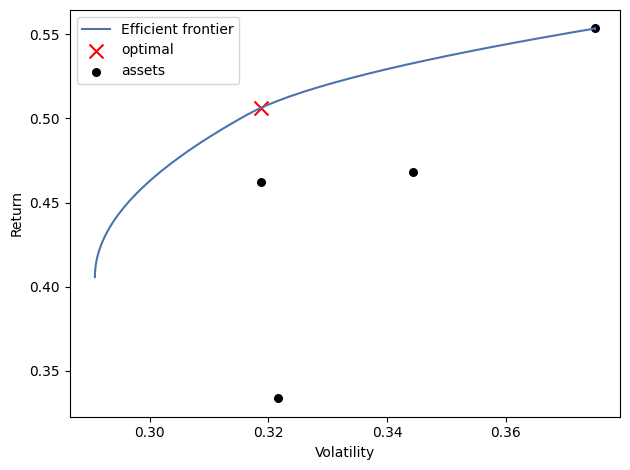

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Download price data for some assets
from yfinance import download
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN']  # Choose your assets
prices = download(tickers, start='2020-01-01', end='2021-12-31')['Adj Close']

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(prices)
S = risk_models.sample_cov(prices)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)

# Print cleaned weights
print(cleaned_weights)

from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True)
ax = plotting.plot_efficient_frontier(cla, showfig=False)
plt.show()